# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

According to the Materials and Methods section of the paper, the dataset collected is related to 17 campaigns that occurred between May 2008 and November 2010, corresponding to a total of 79354 contacts.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
# import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.preprocessing import LabelEncoder

import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```




Let's do some exploratory analysis of the data to understand the how some of the features had an impact on the output variable.

In [4]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df.shape

(41188, 21)

In [7]:
df.describe(exclude='number')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


#### Missing data

In [8]:
null_columns = pd.DataFrame(df.isnull().sum())
null_columns = null_columns.rename(columns={0: 'Missing count'})
null_columns

,Missing count
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


No missing values. However, the some of the categorical, demographic data has "unknown" values.

In [9]:
unknown_rows_count = df.apply(lambda row: row.str.lower().eq('unknown').any(), axis=1).sum()
print(f'Rows with "unknown": {unknown_rows_count}')

Rows with "unknown": 10700


In [10]:
df.replace("unknown", pd.NA, inplace=True)

In [11]:
null_columns = pd.DataFrame(df.isnull().sum())
null_columns = null_columns.rename(columns={0: 'Missing count'})
null_columns

,Missing count
age,0
job,330
marital,80
education,1731
default,8597
housing,990
loan,990
contact,0
month,0
day_of_week,0


In [12]:
df.dropna(inplace=True)

#### Duplicates

In [13]:
duplicates = df[df.duplicated()]

print(f'Duplicates: {duplicates.shape[0]}')

Duplicates: 10


In [14]:
duplicates

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
36951,45,admin.,married,university.degree,no,no,no,cellular,jul,thu,...,1,999,0,nonexistent,-2.9,92.469,-33.6,1.072,5076.2,yes
38281,71,retired,single,university.degree,no,no,no,telephone,oct,tue,...,1,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,no


In [15]:
# drop duplicates
df.drop_duplicates(inplace=True)

#### Duration

The column description for duration indicates it is too highly correlated with the target value, and therefore should be dropped from the analysis.

In [16]:
df.drop(['duration'], axis=1, inplace=True)

In [17]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


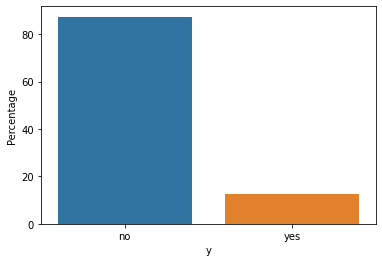

In [18]:
# Calculate the percentage of each category
df_count = df['y'].value_counts(normalize=True).reset_index()
df_count.columns = ['y', 'percentage']
df_count['percentage'] *= 100  # Convert to percentage

# Create the bar plot
sns.barplot(data=df_count, x='y', y='percentage')
plt.ylabel('Percentage')
plt.show()

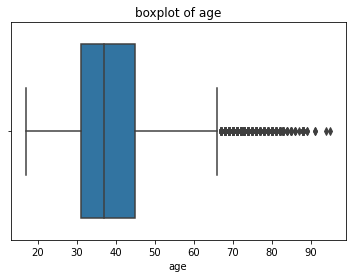

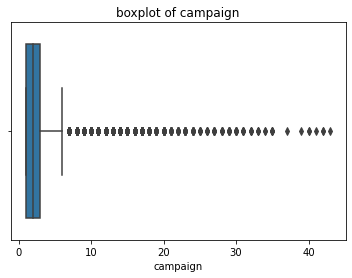

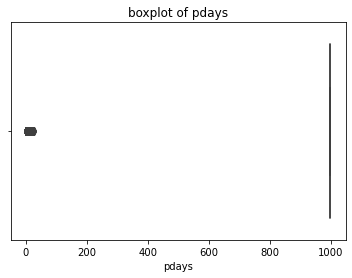

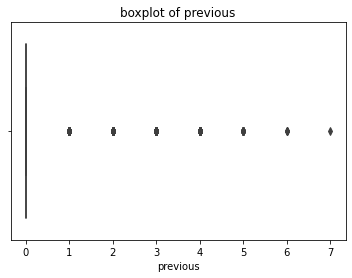

In [19]:
num_columns = ['age', 'campaign','pdays','previous']

for column in num_columns:
    sns.boxplot(x=df[column])
    plt.title(f'boxplot of {column}')
    plt.show()

Although the interquartile ranges for some of these numeric variables are quite narrow, the spread is acceptable to me as it is reasonable within the given context.

The pdays is the sole numeric attribute requiring attention. It is assigned a value of 999 when no prior contact has been made with the consumer, which could complicate things for our model.

There are two sensible approaches available: either categorizing the values into bins or handling them as binary variables.

Let’s review the counts of each value to decide our next steps.

In [20]:
pd.DataFrame(df['pdays'].value_counts(normalize=True)).sort_values(by=['pdays'])

,proportion
pdays,
0,0.000459
1,0.000689
2,0.001739
3,0.012501
4,0.003347
5,0.001411
6,0.011910
7,0.001641
8,0.000427


Because 96% of individuals were never contacted (999), then we should just make it binary.

In [21]:
df['contacted'] = (df['pdays'] != 999).astype(int)
df.drop(['pdays'], axis=1, inplace=True)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,contacted
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


In [22]:
df['contacted'].value_counts()

contacted
0    29168
1     1310
Name: count, dtype: int64

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30478 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30478 non-null  int64  
 1   job             30478 non-null  object 
 2   marital         30478 non-null  object 
 3   education       30478 non-null  object 
 4   default         30478 non-null  object 
 5   housing         30478 non-null  object 
 6   loan            30478 non-null  object 
 7   contact         30478 non-null  object 
 8   month           30478 non-null  object 
 9   day_of_week     30478 non-null  object 
 10  campaign        30478 non-null  int64  
 11  previous        30478 non-null  int64  
 12  poutcome        30478 non-null  object 
 13  emp.var.rate    30478 non-null  float64
 14  cons.price.idx  30478 non-null  float64
 15  cons.conf.idx   30478 non-null  float64
 16  euribor3m       30478 non-null  float64
 17  nr.employed     30478 non-null  floa

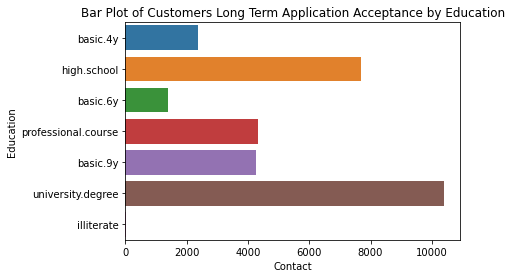

In [24]:
# Bar plot of count of accepted term deposit application by Education
ax = sns.countplot(y ='education', data = df)

# Adding Title to the Plot
ax.set_title('Bar Plot of Customers Long Term Application Acceptance by Education')

# Setting the X and Y labels
ax.set_xlabel('Contact')
ax.set_ylabel('Education')

# Show the plot
plt.show()

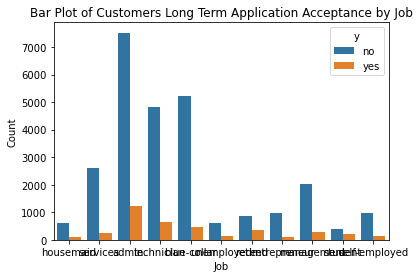

In [25]:
# Bar plot of count of accepted term deposit application by job
ax = sns.countplot(x ='job', hue = "y", data = df)

# Adding Title to the Plot
ax.set_title('Bar Plot of Customers Long Term Application Acceptance by Job')

# Setting the X and Y labels
ax.set_xlabel('Job')
ax.set_ylabel('Count')

# Show the plot
plt.show()

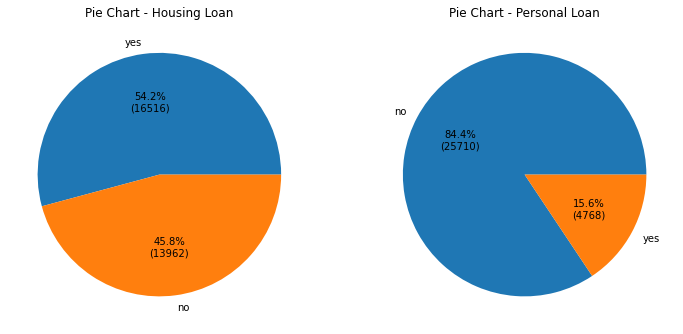

In [26]:
# Plot some pie charts to visualize the number of accepted term deposits by loan types in dataset
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

#plt.pie(df['LoanStatus'].value_counts().values, labels=df['LoanStatus'].value_counts().index, autopct=fmt)

# create a figure with two subplots
#fig, ax = plt.subplots(figsize=(12,8))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,7))

# plot each pie chart in a separate subplot

ax1.set_title('Pie Chart - Housing Loan')
s = df['housing'].value_counts()
ax1.pie(s,labels = s.index,  autopct=autopct_format(s))

ax2.set_title('Pie Chart - Personal Loan')
s1 = df['loan'].value_counts()
ax2.pie(s1,labels = s1.index, autopct=autopct_format(s1))

plt.show()

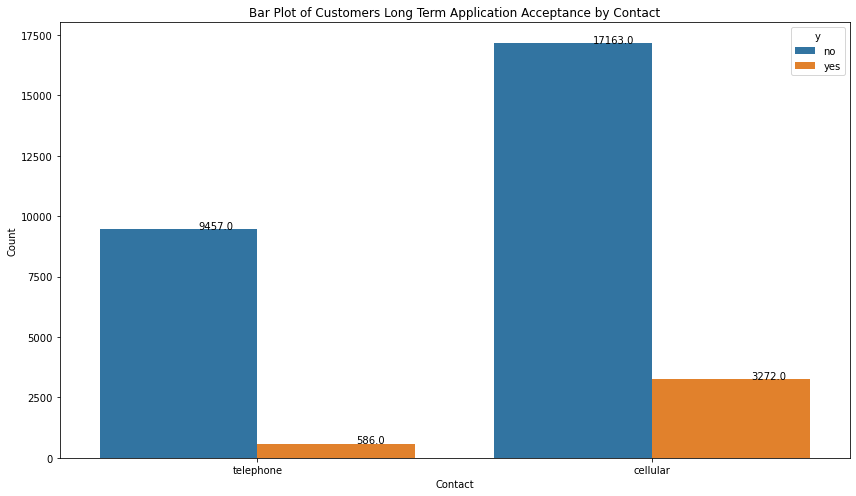

In [27]:
plt.rcParams["figure.figsize"] = [12, 7]
plt.rcParams["figure.autolayout"] = True
ax = sns.countplot(x ='contact', hue = "y", data = df)

# Adding Title to the Plot
ax.set_title('Bar Plot of Customers Long Term Application Acceptance by Contact')

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

# Setting the X and Y labels
ax.set_xlabel('Contact')
ax.set_ylabel('Count')
 
# Show the plot
plt.show()

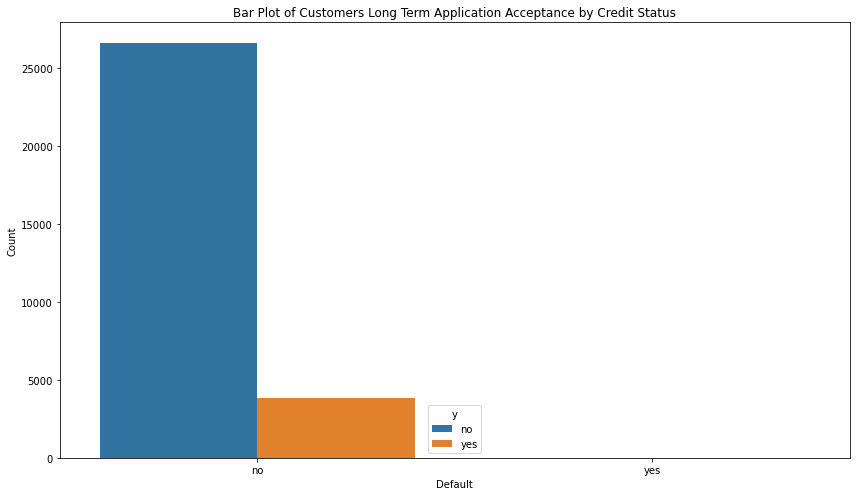

In [28]:
# Bar plot of count of accepted term deposit application by job
ax = sns.countplot(x ='default', hue = "y", data = df)

# Adding Title to the Plot
ax.set_title('Bar Plot of Customers Long Term Application Acceptance by Credit Status')

# Setting the X and Y labels
ax.set_xlabel('Default')
ax.set_ylabel('Count')

# Show the plot
plt.show()

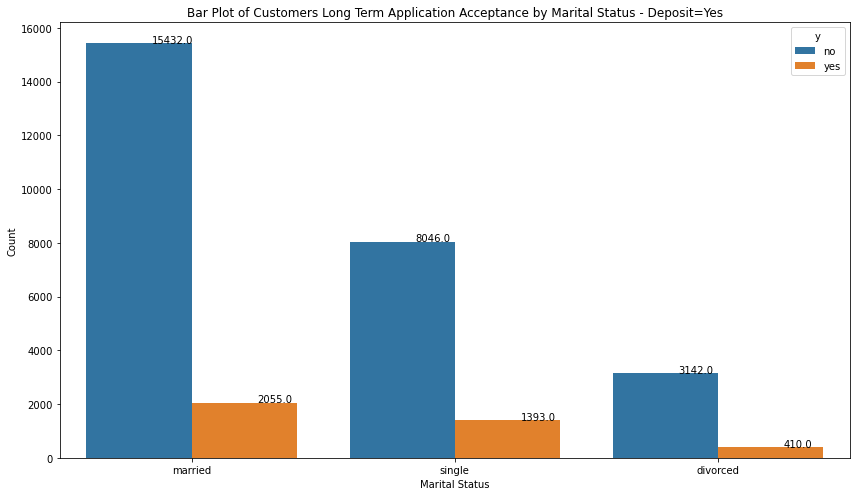

In [29]:
# Let plot a bar chart of the
# count plot on two categorical variable

plt.rcParams["figure.figsize"] = [12, 7]
plt.rcParams["figure.autolayout"] = True
ax = sns.countplot(x = df['marital'], hue = df["y"], data = df)

# Adding Title to the Plot
ax.set_title('Bar Plot of Customers Long Term Application Acceptance by Marital Status - Deposit=Yes')

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

# Setting the X and Y labels
ax.set_xlabel('Marital Status')
ax.set_ylabel('Count')
 
# Show the plot
plt.show()

#### Observations:
Upon examining the plots indicating successful enrollments in the Bank's Product/Marketing campaign, the following trends are evident:

1. Marital Status: The bank achieved higher success rates among married customers, followed by those who are single.
2. Education: Individuals with a university degree predominantly accepted the bank's loan product.
3. Job: The bank saw its greatest success with individuals employed in administrative roles, which encompass a wide range, followed by technicians and then those in blue-collar jobs.
4. Communication: The marketing campaign proved more effective with individuals who utilized cellular phones.

### Business goal

This dataset originates from a Portuguese banking institution and comprises data from various marketing campaigns. The analysis indicates that these campaigns were generally ineffective in securing customer subscriptions to the long-term deposit product. Consequently, our Machine Learning project aims to enhance campaign efficiency by identifying factors that could potentially increase the success rate.

From a business perspective, the goal is to build a predictive model that can determine the effectiveness of different strategies and conditions, such as:

1. The influence of loan products on customer engagement. For instance, we need to explore whether targeting customers with housing loans could improve outcomes.
2. The potential increase in success rates among customers with a higher educational background, specifically those with a university degree.
3. The impact of different contact methods, with a particular focus on the efficacy of cellular phone communications in engaging customers.
4. Additionally, there has been a noted decrease in the overall effectiveness of marketing campaigns with increasing frequency. In response, more aggressive and direct marketing tactics have been employed. Our approach will focus on refining these strategies by utilizing insights from the data, particularly examining how seven key bank attributes influence the acceptance rates of offers.

This strategic analysis aims to not only improve the targeting and execution of future campaigns but also to better understand the dynamics of customer behavior in response to various marketing approaches.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [30]:
# Create a dataset with columns 1-7 for features and deposit for target column
# for the purposes of this re-use, create a list of features 1-7
feature_cols = [
    'job', 'marital', 'education', 'default', 'housing',
    'loan', 'contact'
]


X = df[feature_cols]
y = df['y']

In [31]:
X.head(10)

,job,marital,education,default,housing,loan,contact
0,housemaid,married,basic.4y,no,no,no,telephone
2,services,married,high.school,no,yes,no,telephone
3,admin.,married,basic.6y,no,no,no,telephone
4,services,married,high.school,no,no,yes,telephone
6,admin.,married,professional.course,no,no,no,telephone
8,technician,single,professional.course,no,yes,no,telephone
9,services,single,high.school,no,yes,no,telephone
11,services,single,high.school,no,yes,no,telephone
12,blue-collar,single,high.school,no,no,yes,telephone
13,housemaid,divorced,basic.4y,no,yes,no,telephone


In [32]:
X['contact'].value_counts()

contact
cellular     20435
telephone    10043
Name: count, dtype: int64

For category data, use ColumnTransformer to selectively apply data preparation transforms, it allows us to apply a specific transform or sequence of transforms to just the numerical columns, and a separate sequence of transforms to just the categorical columns.

In [56]:
# Define the column transformer
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), ['job', 'marital', 'education', 'default', 'contact']),
    (OrdinalEncoder(), ['housing', 'loan']),
    remainder='passthrough'
)

# Fit and transform X data
X_transformed = column_trans.fit_transform(X).toarray()

# Print shape of transformed data to check the number of columns
print("Shape of transformed data:", X_transformed.shape)

# For OneHotEncoder columns: get feature names based on the input columns
ohe_features = list(column_trans.named_transformers_['onehotencoder'].get_feature_names_out(['job', 'marital', 'education', 'default', 'contact']))


# For OrdinalEncoder columns: names remain unchanged
ordinal_features = ['housing', 'loan']

# Adding remainder column names (columns that were passed through without transformation)
# Here, we identify which columns were passed through
passthrough_columns = set(X.columns) - set(['job', 'marital', 'education', 'default', 'contact', 'housing', 'loan'])
passthrough_features = list(passthrough_columns)
print(passthrough_features)

# Combine all feature names
all_features = ohe_features + ordinal_features + passthrough_features
print(all_features)

# Check if feature count matches the column count of transformed data
if len(all_features) != X_transformed.shape[1]:
    raise ValueError(f"Mismatch in number of transformed columns ({X_transformed.shape[1]}) and feature names ({len(all_features)}). Check the transformations.")

# Convert the transformed array back to a DataFrame
X_transformed_df = pd.DataFrame(X_transformed, columns=all_features)

# Display the DataFrame
print(X_transformed_df.head())

Shape of transformed data: (30478, 27)
[]
['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'marital_divorced', 'marital_married', 'marital_single', 'education_basic.4y', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'default_no', 'default_yes', 'contact_cellular', 'contact_telephone', 'housing', 'loan']
   job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0         0.0              0.0               0.0            1.0   
1         0.0              0.0               0.0            0.0   
2         1.0              0.0               0.0            0.0   
3         0.0              0.0               0.0            0.0   
4         1.0              0.0               0.0            0.0   

   job_management  job_retired  job_se

Use LabelEncoder to encode labels of the target column

In [34]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y = pd.Series(y_encoded)  # Update y with the encoded array
y.head()

0    0
1    0
2    0
3    0
4    0
dtype: int32

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed_df, y, test_size=0.3, random_state=42)

In [36]:
X_train.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_no,default_yes,contact_cellular,contact_telephone,housing,loan
1166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
6536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
14070,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
9149,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
12487,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [37]:
y.head()

0    0
1    0
2    0
3    0
4    0
dtype: int32

In [38]:
# note that we will need to scale our data in order for the models to work
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [39]:
# using majority class as baseline
# simple classification model where we predict the majority class
# which in this case is basically the "no's"
majority_class = y.mode().iloc[0]
baseline_accuracy = (y == majority_class).mean()

In [40]:
print(f'Baseline accuracy using majority class: {baseline_accuracy}')

Baseline accuracy using majority class: 0.8734168908721045


This value is already very higher.

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [41]:
# build model
lr_bank_model = LogisticRegression()
lr_bank_model.fit(X_train_scaled, y_train)

LogisticRegression()

### Problem 9: Score the Model

What is the accuracy of your model?

In [42]:
# predict
y_pred_lr= lr_bank_model.predict(X_test_scaled)

lr_accuracy = accuracy_score(y_test, y_pred_lr)
print(lr_accuracy)

0.8704068241469817


In [43]:
print(f'LogReg is better than baseline: {lr_accuracy > baseline_accuracy}')
print(f'Difference: {lr_accuracy - baseline_accuracy}')

LogReg is better than baseline: False
Difference: -0.0030100667251228286


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

#### Logistic Regression (again)

Re-running logistic regression so we can capture training time and accuracy.

In [44]:
# train and calculate training time
lr_bank_model = LogisticRegression()
start = time.time()
lr_bank_model.fit(X_train_scaled, y_train)
end = time.time()
lr_bank_train_time = end - start

# predict with training data. determine accuracy
lr_bank_train_y_pred = lr_bank_model.predict(X_train_scaled)
lr_bank_train_accuracy = accuracy_score(y_train, lr_bank_train_y_pred)

# predict with test data determine accuracy
lr_bank_test_y_pred = lr_bank_model.predict(X_test_scaled)
lr_bank_test_accuracy = accuracy_score(y_test, lr_bank_test_y_pred)


print(lr_bank_train_time, lr_bank_train_accuracy, lr_bank_test_accuracy)

0.1320018768310547 0.8746601668697853 0.8704068241469817


#### Decision Trees

In [45]:
dt_model = DecisionTreeClassifier()

# train the model and use time to calculate train time
start = time.time()
dt_model.fit(X_train_scaled, y_train)
end = time.time()
dt_train_time = end - start

# predict with training data. determine accuracy
dt_train_y_pred = dt_model.predict(X_train_scaled)
dt_train_accuracy = accuracy_score(y_train, dt_train_y_pred)

# predict with test data determine accuracy
dt_test_y_pred = dt_model.predict(X_test_scaled)
dt_test_accuracy = accuracy_score(y_test, dt_test_y_pred)


print(dt_train_time, dt_train_accuracy, dt_test_accuracy)

0.19899749755859375 0.8779881878691291 0.8660323709536308


#### SVC

In [46]:
svc_model = SVC()

# train the model and use time to calculate train time
start = time.time()
svc_model.fit(X_train_scaled, y_train)
end = time.time()
svc_train_time = end - start

# predict with training data. determine accuracy
svc_train_y_pred = svc_model.predict(X_train_scaled)
svc_train_accuracy = accuracy_score(y_train, svc_train_y_pred)

# predict with test data determine accuracy
svc_test_y_pred = svc_model.predict(X_test_scaled)
svc_test_accuracy = accuracy_score(y_test, svc_test_y_pred)


print(svc_train_time, svc_train_accuracy, svc_test_accuracy)

25.281269073486328 0.8751757757570076 0.8696412948381452


#### KNN

In [47]:
knn_model = KNeighborsClassifier() # five is default per documentation

# train the model and use time to calculate train time
start = time.time()
knn_model.fit(X_train_scaled, y_train)
end = time.time()
knn_train_time = end - start

# predict with training data. determine accuracy
knn_train_y_pred = knn_model.predict(X_train_scaled)
knn_train_accuracy = accuracy_score(y_train, knn_train_y_pred)

# predict with test data determine accuracy
knn_test_y_pred = knn_model.predict(X_test_scaled)
knn_test_accuracy = accuracy_score(y_test, knn_test_y_pred)


print(knn_train_time, knn_train_accuracy, knn_test_accuracy)

0.007996082305908203 0.8741445579825631 0.8611111111111112


#### Consolidate all the results

In [48]:
consolidated_df = pd.DataFrame({
    'Model': ['Baseline', 'Logistic Regression', 'KNN', 'Decision Tree', 'SVM'],
    'Train Time': ['N/A', lr_bank_train_time, knn_train_time, dt_train_time, svc_train_time],  
    'Train Accuracy': ['N/A', lr_bank_train_accuracy, knn_train_accuracy, dt_train_accuracy, svc_train_accuracy],  
    'Test Accuracy': [baseline_accuracy, lr_bank_test_accuracy, knn_test_accuracy, dt_test_accuracy, svc_test_accuracy]
})

consolidated_df

,Model,Train Time,Train Accuracy,Test Accuracy
0,Baseline,N/A,N/A,0.873417
1,Logistic Regression,0.132002,0.87466,0.870407
2,KNN,0.007996,0.874145,0.861111
3,Decision Tree,0.198997,0.877988,0.866032
4,SVM,25.281269,0.875176,0.869641


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

Grid search is a technique used to find the optimal set of hyperparameters for a model from the provided search space.

Grid search will iterate over all black circles in a sequence
And finally gives the best set of hyperparameters based on the best score obtained
Grid Seach doesn’t work well on large search spaces. It will find the best set of hyperparameters but at a high cost. Grid search is best used when we have small search space. We can use a grid search to get the best possible results when we don’t have any time constraints, but when we have time constraints, it’s better to go with the random search.

#### LogisticRegression Tuned

LogisticRegression has a lot of hyperparameters, so let's use gridsearch to find the best params

In [49]:
# gridsearch
lr_model_tune = LogisticRegression()

# try C hyper parameter
lr_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_search_lr = GridSearchCV(estimator=lr_model_tune, param_grid=lr_param_grid, scoring='accuracy')
grid_search_lr.fit(X_train_scaled, y_train)
lr_c_param = grid_search_lr.best_params_['C']

best_lr = LogisticRegression(C=lr_c_param)
start = time.time()
best_lr.fit(X_train_scaled, y_train)
end = time.time()
lr_best_train_time = end - start

# predict with training data. determine accuracy
lr_best_train_y_pred = best_lr.predict(X_train_scaled)
lr_best_train_accuracy = accuracy_score(y_train, lr_best_train_y_pred)

# predict with test data determine accuracy
lr_best_test_y_pred = best_lr.predict(X_test_scaled)
lr_best_test_accuracy = accuracy_score(y_test, lr_best_test_y_pred)


print(lr_best_train_time, lr_best_train_accuracy, lr_best_test_accuracy)

0.04200148582458496 0.8747070404049874 0.8704068241469817


#### KNN Tuned

In [50]:
# tune hyper parameter
knn_model = KNeighborsClassifier() # five is default per documentation
n_neighbors_values = np.linspace(1, 15, 15, dtype=int)
knn_param_grid = {'n_neighbors': n_neighbors_values}
grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=knn_param_grid, scoring='accuracy')
grid_search_knn.fit(X_train_scaled, y_train)
best_n_neighbors = grid_search_knn.best_params_['n_neighbors']

# train the model using best hyperparemeter
best_knn_model = KNeighborsClassifier(n_neighbors=best_n_neighbors)
start = time.time()
best_knn_model.fit(X_train_scaled, y_train)
end = time.time()
knn_best_train_time = end - start

# predict with training data. determine accuracy
knn_best_train_y_pred = best_knn_model.predict(X_train_scaled)
knn_best_train_accuracy = accuracy_score(y_train, knn_best_train_y_pred)
# predict with test data determine accuracy
knn_best_test_y_pred = best_knn_model.predict(X_test_scaled)
knn_best_test_accuracy = accuracy_score(y_test, knn_best_test_y_pred)


print(knn_best_train_time, knn_best_train_accuracy, knn_best_test_accuracy)

0.003999471664428711 0.8751757757570076 0.8665791776027997


#### Decision Tree Tuned

In [51]:
dt_model_tune = DecisionTreeClassifier()

# tune hyperparameter max_depth
depth_values = np.linspace(1, 20, 20, dtype=int)
dt_param_grid = {
    'max_depth': depth_values
}
grid_search_dt = GridSearchCV(estimator=dt_model_tune, param_grid=dt_param_grid, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)
max_depth_value = grid_search_dt.best_params_['max_depth']
best_dt = DecisionTreeClassifier(max_depth=max_depth_value)
# train the model and use time to calculate train time
start = time.time()
best_dt.fit(X_train_scaled, y_train)
end = time.time()
dt_best_train_time = end - start

# predict with training data. determine accuracy
dt_best_train_y_pred = best_dt.predict(X_train_scaled)
dt_best_train_accuracy = accuracy_score(y_train, dt_best_train_y_pred)

# predict with test data determine accuracy
dt_best_test_y_pred = best_dt.predict(X_test_scaled)
dt_best_test_accuracy = accuracy_score(y_test, dt_best_test_y_pred)


print(dt_best_train_time, dt_best_train_accuracy, dt_best_test_accuracy)

0.039998769760131836 0.8747070404049874 0.8704068241469817


#### SVM Tuned

In [52]:
svc_model_tune = SVC()
svc_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# tune hyperparameter. use cv=3 due to slow performance
grid_search_svc = GridSearchCV(estimator=svc_model_tune, param_grid=svc_param_grid, cv=3, scoring='accuracy', n_jobs=2)
grid_search_svc.fit(X_train, y_train)
svc_c_param = grid_search_svc.best_params_['C']
best_svc_model = SVC(C=svc_c_param)

# train the model and use time to calculate train time
start = time.time()
best_svc_model.fit(X_train_scaled, y_train)
end = time.time()
best_svc_train_time = end - start

# predict with training data. determine accuracy
svc_best_train_y_pred = best_svc_model.predict(X_train_scaled)
svc_best_train_accuracy = accuracy_score(y_train, svc_best_train_y_pred)
# predict with test data determine accuracy
svc_best_test_y_pred = best_svc_model.predict(X_test_scaled)
svc_best_test_accuracy = accuracy_score(y_test, svc_best_test_y_pred)


print(best_svc_train_time, svc_best_train_accuracy, svc_best_test_accuracy)

17.94569993019104 0.8747070404049874 0.8704068241469817


#### Consolidated Tuned Metrics

In [53]:
consolidated_tuned_df = pd.DataFrame({
    'Model': ['Baseline', 'Logistic Regression', 'KNN', 'Decision Tree', 'SVM'],
    'Train Time': ['N/A', lr_best_train_time, knn_best_train_time, dt_best_train_time, best_svc_train_time],  
    'Train Accuracy': ['N/A', lr_best_train_accuracy, knn_best_train_accuracy, dt_best_train_accuracy, svc_best_train_accuracy],  
    'Test Accuracy': [baseline_accuracy, lr_best_test_accuracy, knn_best_test_accuracy, dt_best_test_accuracy, svc_best_test_accuracy]
})

consolidated_tuned_df

,Model,Train Time,Train Accuracy,Test Accuracy
0,Baseline,N/A,N/A,0.873417
1,Logistic Regression,0.042001,0.874707,0.870407
2,KNN,0.003999,0.875176,0.866579
3,Decision Tree,0.039999,0.874707,0.870407
4,SVM,17.9457,0.874707,0.870407


##### Questions

The Grid Search method does not significantly enhance performance, as the test accuracy achieved remains comparable and similar to the baseline, which relies solely on majority guessing.